<a href="https://www.kaggle.com/code/mesutssmn/disease-symptoms-ml-modelling?scriptVersionId=132806540" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/disease-symptoms-and-patient-profile-dataset/Disease_symptom_and_patient_profile_dataset.csv')

In [3]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [4]:
df.shape

(349, 10)

In [5]:
df.rename(columns={
    'Difficulty Breathing'	: 'DB',
    'Blood Pressure' : 'BP',
    'Cholesterol Level' : 'CL',
    'Outcome Variable' : 'Results'},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Disease  349 non-null    object
 1   Fever    349 non-null    object
 2   Cough    349 non-null    object
 3   Fatigue  349 non-null    object
 4   DB       349 non-null    object
 5   Age      349 non-null    int64 
 6   Gender   349 non-null    object
 7   BP       349 non-null    object
 8   CL       349 non-null    object
 9   Results  349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [7]:
df.groupby(pd.Grouper(key='Gender')).mean()

/tmp/ipykernel_20/1562819012.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(pd.Grouper(key='Gender')).mean()


,Age
Gender,
Female,45.789773
Male,46.867052


([<matplotlib.patches.Wedge at 0x7cba43f4ce80>,
 [Text(0.07420762943588549, 1.0974940672885236, 'High'),
  Text(-0.2502861260131934, -1.0711474478918894, 'Normal'),
  Text(1.085591919662925, -0.17745473778562731, 'Low')],
 [Text(0.04047688878321026, 0.5986331276119219, '47.9%'),
  Text(-0.13651970509810546, -0.5842622443046669, '47.0%'),
  Text(0.592141047088868, -0.09679349333761489, '5.2%')])

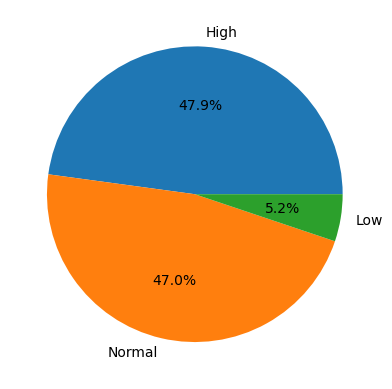

In [8]:
plt.pie(df["BP"].value_counts().values,labels=df["BP"].value_counts().index,autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x7cba4401c7c0>,
 [Text(0.08408374801981604, 1.0967816206150338, 'High'),
  Text(-0.41063867535774146, -1.020478259592256, 'Normal'),
  Text(1.048881678906796, -0.33143208000080615, 'Low')],
 [Text(0.045863862556263284, 0.5982445203354729, '47.56%'),
  Text(-0.2239847320133135, -0.5566245052321395, '42.69%'),
  Text(0.5721172794037069, -0.18078113454589423, '9.74%')])

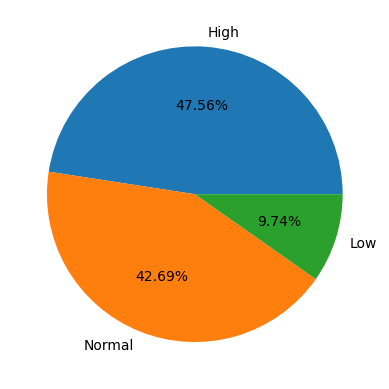

In [9]:
plt.pie(df["CL"].value_counts().values,labels=df["CL"].value_counts().index,autopct="%1.2f%%")

In [10]:
df.Disease.unique()

array(['Influenza', 'Common Cold', 'Eczema', 'Asthma', 'Hyperthyroidism',
       'Allergic Rhinitis', 'Anxiety Disorders', 'Diabetes',
       'Gastroenteritis', 'Pancreatitis', 'Rheumatoid Arthritis',
       'Depression', 'Liver Cancer', 'Stroke', 'Urinary Tract Infection',
       'Dengue Fever', 'Hepatitis', 'Kidney Cancer', 'Migraine',
       'Muscular Dystrophy', 'Sinusitis', 'Ulcerative Colitis',
       'Bipolar Disorder', 'Bronchitis', 'Cerebral Palsy',
       'Colorectal Cancer', 'Hypertensive Heart Disease',
       'Multiple Sclerosis', 'Myocardial Infarction (Heart...',
       'Urinary Tract Infection (UTI)', 'Osteoporosis', 'Pneumonia',
       'Atherosclerosis', 'Chronic Obstructive Pulmonary...', 'Epilepsy',
       'Hypertension', 'Obsessive-Compulsive Disorde...', 'Psoriasis',
       'Rubella', 'Cirrhosis', 'Conjunctivitis (Pink Eye)',
       'Liver Disease', 'Malaria', 'Spina Bifida', 'Kidney Disease',
       'Osteoarthritis', 'Klinefelter Syndrome', 'Acne', 'Brain Tumor',


In [11]:
df['Disease'].value_counts()

Asthma                            23
Stroke                            16
Osteoporosis                      14
Hypertension                      10
Diabetes                          10
                                  ..
Autism Spectrum Disorder (ASD)     1
Hypoglycemia                       1
Fibromyalgia                       1
Eating Disorders (Anorexia,...     1
Williams Syndrome                  1
Name: Disease, Length: 116, dtype: int64

In [12]:
np.where(df['Disease']=='Influenza')

(array([  0,   6,   7,  45,  46, 100, 146, 272]),)

In [13]:
dfd = pd.get_dummies(df,columns=['Fever','Cough','Fatigue','DB','BP','CL','Gender'],drop_first=True)

In [14]:
dfd.head()

,Disease,Age,Results,Fever_Yes,Cough_Yes,Fatigue_Yes,DB_Yes,BP_Low,BP_Normal,CL_Low,CL_Normal,Gender_Male
0,Influenza,19,Positive,1,0,1,1,1,0,0,1,0
1,Common Cold,25,Negative,0,1,1,0,0,1,0,1,0
2,Eczema,25,Negative,0,1,1,0,0,1,0,1,0
3,Asthma,25,Positive,1,1,0,1,0,1,0,1,1
4,Asthma,25,Positive,1,1,0,1,0,1,0,1,1


In [15]:
dfd.shape

(349, 12)

In [16]:
df[df.values == pd.isna(np.nan)]

,Disease,Fever,Cough,Fatigue,DB,Age,Gender,BP,CL,Results


There is no any null or NaN values in the dataframe.

In [17]:
np.where(df.isna()==True)

(array([], dtype=int64), array([], dtype=int64))

We can get same result with this code.

In [18]:
df.groupby(by='Disease').mean()

/tmp/ipykernel_20/2665515548.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Disease').mean()


,Age
Disease,
Acne,40.000000
Allergic Rhinitis,40.333333
Alzheimer's Disease,67.000000
Anemia,50.000000
Anxiety Disorders,43.166667
...,...
Ulcerative Colitis,36.000000
Urinary Tract Infection,40.200000
Urinary Tract Infection (UTI),43.333333


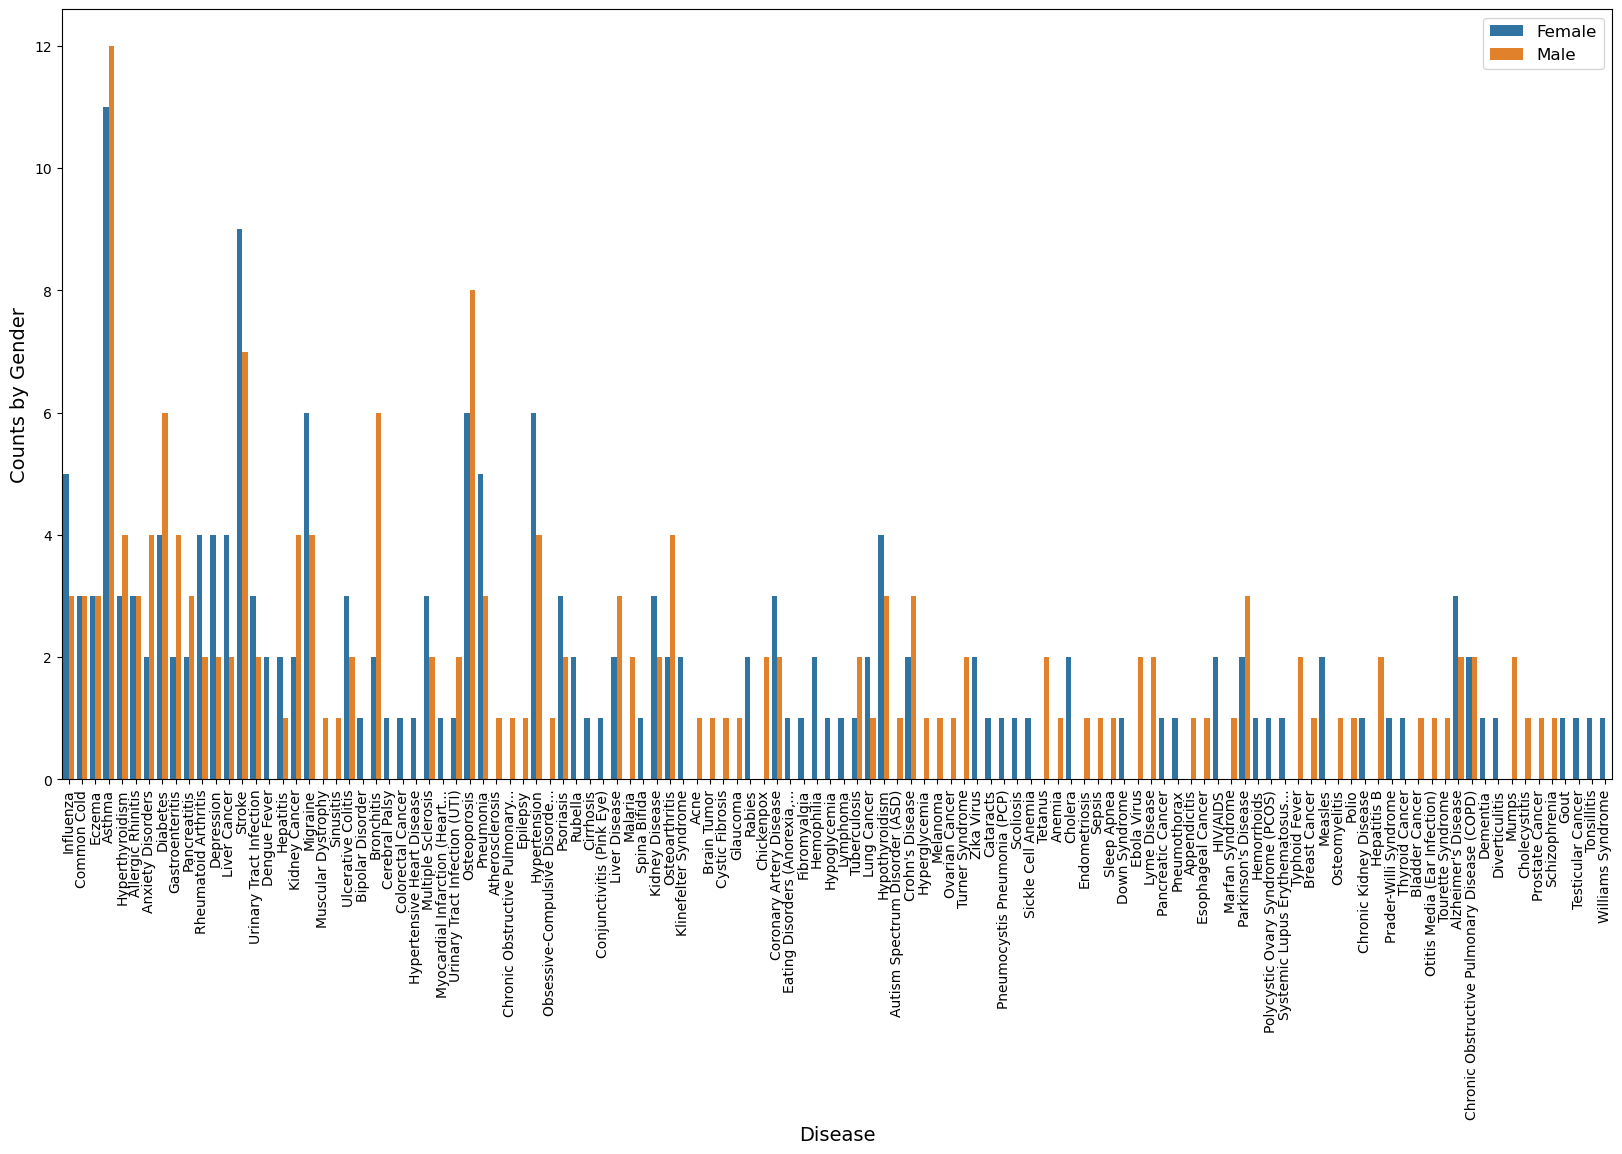

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x = df['Disease'],hue = df['Gender'])
plt.xticks(rotation=90,fontsize=10)
plt.xlabel('Disease', fontsize=14)
plt.ylabel('Counts by Gender', fontsize=14)
plt.legend(fontsize=12)
plt.show()

/tmp/ipykernel_20/3091208700.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df.groupby(by='Disease').mean().index,df.groupby(by='Disease').mean(),color='darkred')
/tmp/ipykernel_20/3091208700.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df.groupby(by='Disease').mean().index,df.groupby(by='Disease').mean(),color='darkred')


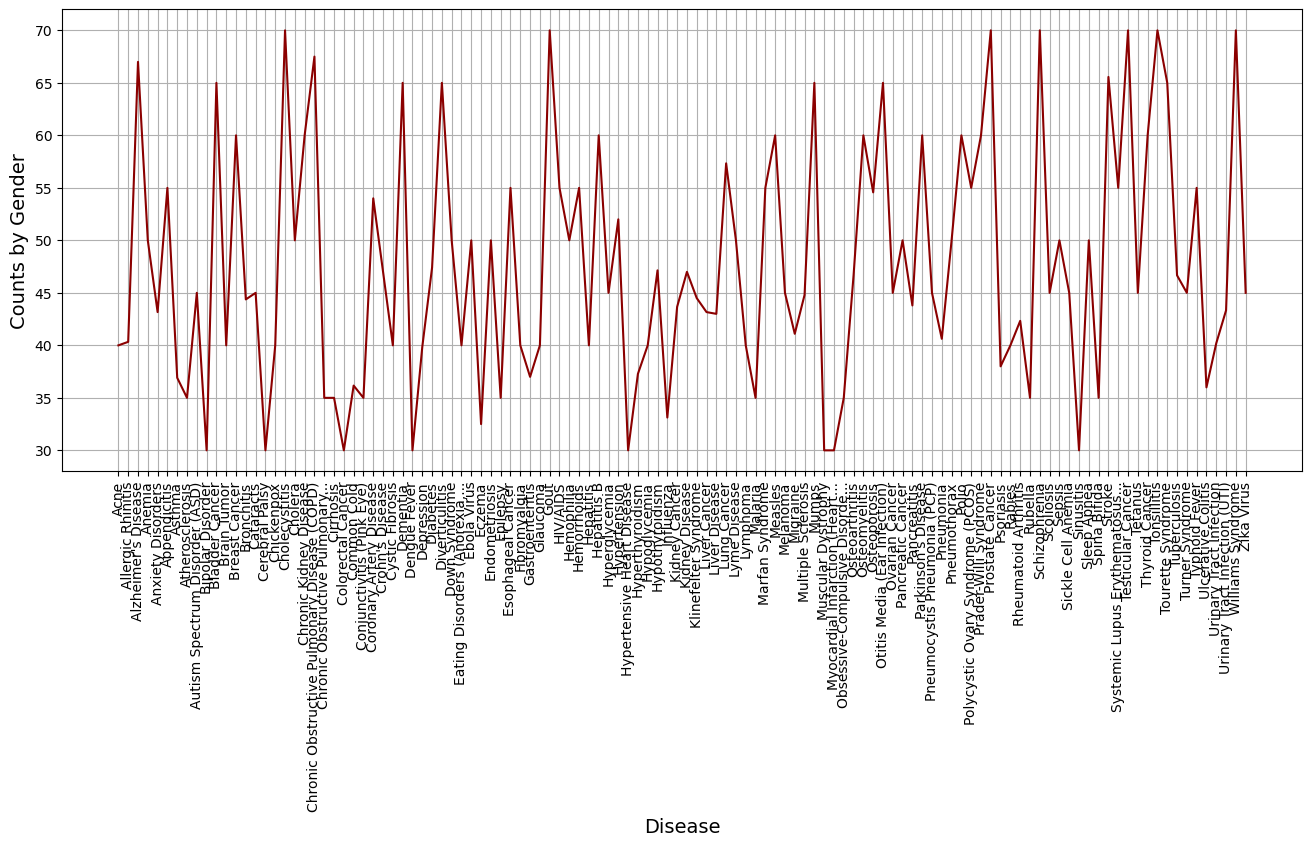

In [20]:
plt.figure(figsize=(16,6))
plt.plot(df.groupby(by='Disease').mean().index,df.groupby(by='Disease').mean(),color='darkred')
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Disease', fontsize=14)
plt.ylabel('Counts by Gender', fontsize=14)
plt.grid(visible=True)
plt.show()

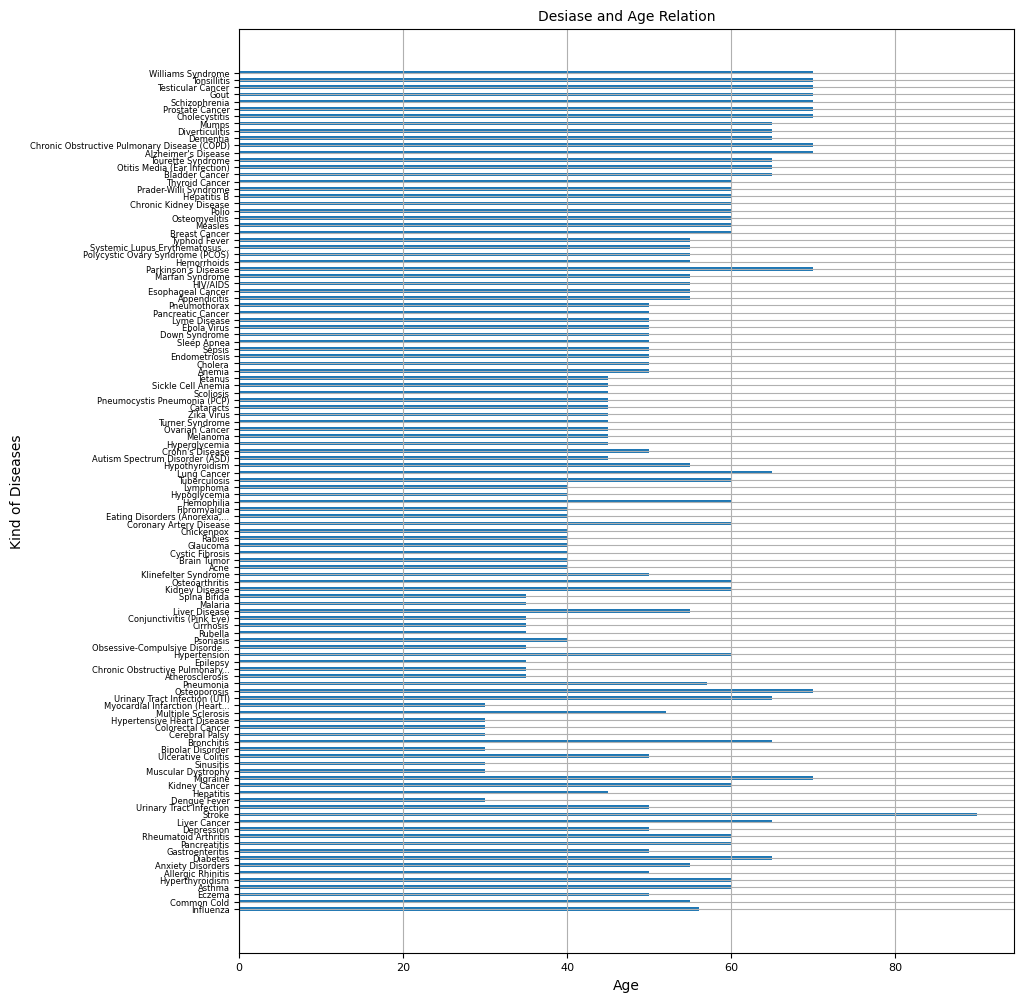

In [21]:
plt.figure(figsize=(10,12))
plt.barh(df['Disease'].values,df['Age'].values,height=0.5,align='center')
plt.xticks(fontsize=8)
plt.yticks(fontsize=6)
plt.xlabel('Age',fontsize=10)
plt.ylabel('Kind of Diseases',fontsize=10)
plt.title('Desiase and Age Relation',fontsize=10)
plt.grid()
plt.show()

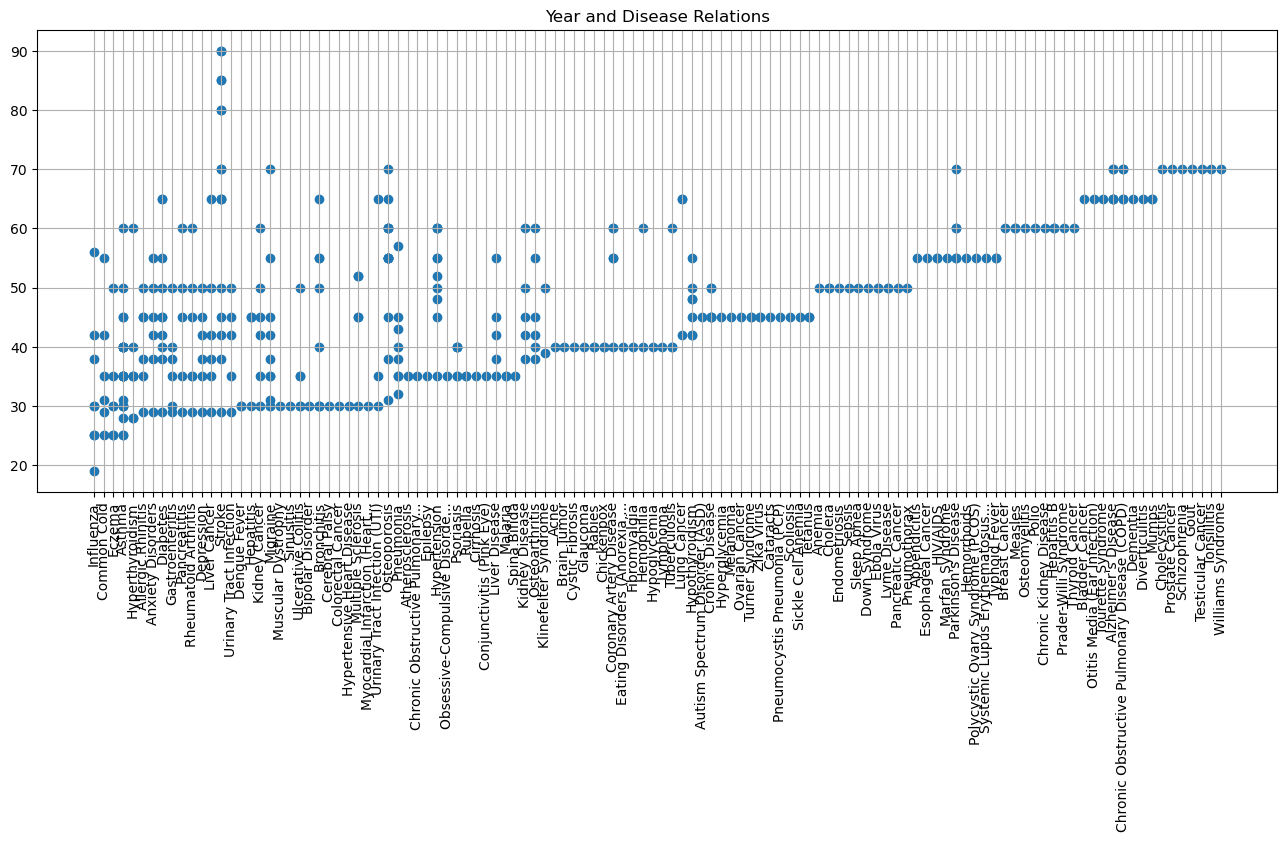

In [22]:
plt.figure(figsize=(16,6))
plt.scatter(df['Disease'],df['Age'])
plt.xticks(rotation=90)
plt.title('Year and Disease Relations')
plt.grid()
plt.show()

In [23]:
dfd.drop('Disease',axis=1,inplace=True)

In [24]:
y = dfd['Results']
x = dfd.drop('Results',axis=1)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [26]:
x_train , y_train

(     Age  Fever_Yes  Cough_Yes  Fatigue_Yes  DB_Yes  BP_Low  BP_Normal  \
 140   40          0          1            0       0       0          1   
 257   55          1          1            0       0       0          1   
 272   56          1          1            1       1       0          0   
 304   65          0          0            1       0       0          1   
 117   40          0          0            1       0       0          0   
 ..   ...        ...        ...          ...     ...     ...        ...   
 8     28          0          1            0       0       0          1   
 73    35          1          0            1       0       0          0   
 118   40          0          0            1       0       0          0   
 189   45          1          0            1       0       0          1   
 206   50          0          0            1       0       0          1   
 
      CL_Low  CL_Normal  Gender_Male  
 140       0          0            0  
 257       1        

In [27]:
forest1 = RandomForestClassifier(criterion='entropy',max_depth=8)
model1 = forest1.fit(x_train,y_train)
model1.score(x_test,y_test)

0.7857142857142857

In [28]:
y_pred = model1.predict(x_test)

In [29]:
y_pred

array(['Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative'],
      dtype=object)

In [30]:
y_test

62     Negative
127    Positive
47     Positive
184    Positive
323    Positive
         ...   
275    Negative
176    Negative
6      Positive
306    Negative
88     Positive
Name: Results, Length: 70, dtype: object

In [31]:
accuracy_score(y_test, y_pred)

0.7857142857142857

In [32]:
model1.predict([[32,1,1,1,1,1,0,1,0,1]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Positive'], dtype=object)

In this model our patient has all the bad findings and it shows us he is ill. Our prediction model predicted that correctly.

In [33]:
dfd.head()

,Age,Results,Fever_Yes,Cough_Yes,Fatigue_Yes,DB_Yes,BP_Low,BP_Normal,CL_Low,CL_Normal,Gender_Male
0,19,Positive,1,0,1,1,1,0,0,1,0
1,25,Negative,0,1,1,0,0,1,0,1,0
2,25,Negative,0,1,1,0,0,1,0,1,0
3,25,Positive,1,1,0,1,0,1,0,1,1
4,25,Positive,1,1,0,1,0,1,0,1,1


In [34]:
model1.predict([[32,0,0,1,0,0,1,0,1,1]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Negative'], dtype=object)

In this prediction our model has a correct prediction again. Our patient has just fatigue and there aren't any other bad findings. He has just need to rest.

In [35]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18  8]
 [ 7 37]]


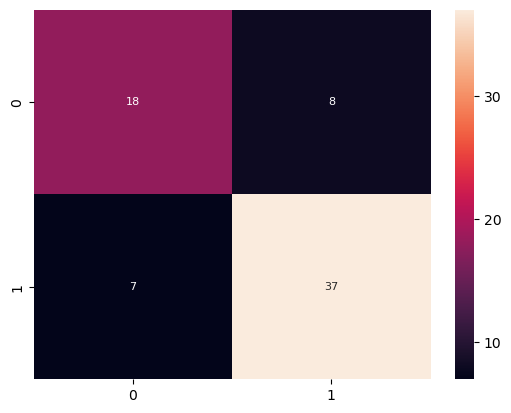

In [36]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,annot_kws={"size":8})
sns.set(font_scale=10)
plt.show()

In this confusion matrix we can see, we have 14 bad results in our model. We can figure this out if we have improve our model by feeding it with more data and calculating error scores.

In [37]:
pipe = Pipeline([('scaler', MinMaxScaler()),('rfc', RandomForestClassifier())])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.7571428571428571

In [38]:
y_pred2 = pipe.predict(x_test)

In [39]:
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[19  7]
 [10 34]]
